In [1]:
import numpy as np
from qutip import *

In [2]:
# Define the parameters of the system
N = 5 # number of Fock states to include in the field
wc = 1.0 # cavity frequency
wa = 1.0 # atom frequency
g = 0.1 # atom-field coupling strength

In [3]:
# Define the operators for the system
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
n = a.dag() * a
sz = sm.dag() * sm

In [4]:
# Define the Hamiltonian
H = wc * n + wa * sz + g * (a.dag() * sm + a * sm.dag())

In [5]:
# Define the initial state
psi0 = tensor(basis(N, 0), basis(2, 0))

In [15]:
# Define the time vector for the simulation
tlist = np.linspace(0, 50,500)

In [16]:
# Perform the simulation
result = mesolve(H, psi0, tlist, [], [n, sz])

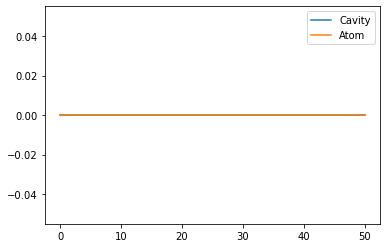

In [17]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(result.times, result.expect[0], label='Cavity')
plt.plot(result.times, result.expect[1], label='Atom')
plt.legend()
plt.show()